In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [3]:
mode='rgb'
figpath='picdir/winnie.jpg'
def read_picmode(figpath,mode='rgb'):#決定讀取黑白還彩色
    if (mode=='rgb'):
        pic=cv2.imread(figpath)
        pic = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
    elif (mode=='gray'):
        pic=cv2.imread(figpath, cv2.IMREAD_GRAYSCALE)
    return pic
pic=read_picmode(figpath,mode)
print(pic.shape)



(720, 960, 3)


In [4]:
#print(pic)
def power_transform(mode,pic):
    if (mode=='gray'):
        height=pic.shape[0]
        width=pic.shape[1]
        new_pic=np.zeros((height,width))
        for i in range(height):
            for j in range(width):
                new_pic[i][j]=pic[i][j]**0.7 #對灰階做轉換
    else:
        new_pic=np.array(pic)
        height=pic.shape[0]
        width=pic.shape[1]
        for i in range(height):
            for j in range(width):
                new_pic[i][j][0]=pic[i][j][0]**0.8 #只對紅色channel做調整
    return new_pic
new_pic=power_transform(mode,pic)

        

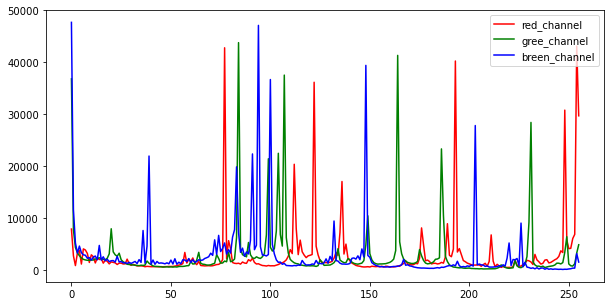

In [4]:
def single_channel_transform(pic):
    height=pic.shape[0]
    weight=pic.shape[1]
    image_histogram=np.zeros(256)
    rgb_histogram=np.zeros((3,256))
    plt.figure(figsize=(10,5))#繪出histogram
    for i in range(height):
        for j in range(weight):
            value=pic[i][j]
            rgb_histogram[0][value[0]]=rgb_histogram[0][value[0]]+1 #r像素質個數
            rgb_histogram[1][value[1]]=rgb_histogram[1][value[1]]+1 #g
            rgb_histogram[2][value[2]]=rgb_histogram[2][value[2]]+1 #b
    plt.plot(rgb_histogram[0],c='r',label='red_channel')
    plt.plot(rgb_histogram[1],c='g',label='gree_channel')
    plt.plot(rgb_histogram[2],c='b',label='breen_channel')
    plt.legend()
    return rgb_histogram
histogram=single_channel_transform(pic)

(256,)


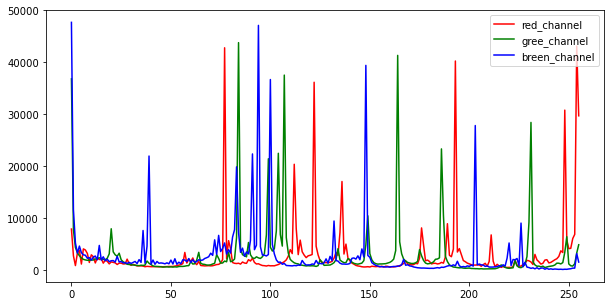

In [11]:
def onechannel_equlization(histogram):
    image_pdf=histogram[0]/(pic.size/3)
    
    image_cdf=np.cumsum(image_pdf)
    image_equ_value=np.around(image_cdf*255).astype('uint8')
    print(image_equ_value.shape)
    convert_pic = image_equ_value[pic[:,:,0]]
    return convert_pic
convert_pic=onechannel_equlization(histogram)
_=single_channel_transform(pic)


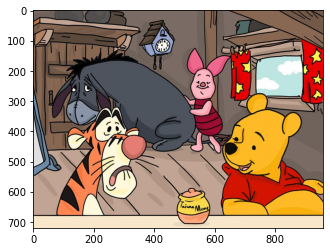

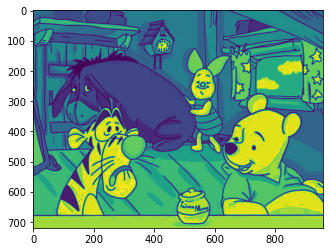

In [10]:


plt.imshow(pic,cmap='gray')
plt.show()
plt.imshow(convert_pic)